In [65]:
# load dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:
# Load data and select trainging hour and test hour
df = pd.read_csv('series.csv')
cols5 = ['21', '22', '23', '24', '25']
cols10 = ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
df['sum5'] = df[cols5].sum(axis=1)
df['sum10'] = df[cols10].sum(axis=1)

trainhour = 6
testhour = 8
testdata = df.drop(df[(df['hour'] != testhour)].index)
data = df.drop(df[(df['hour'] != trainhour)].index)
del df

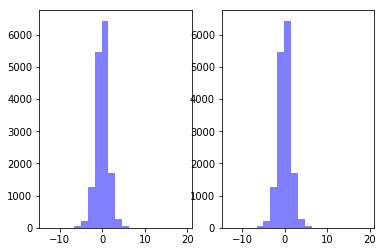

In [67]:
# Plot Histograms
plt.subplot(1,2,1)
plt.hist(data["Change"], 20, facecolor='blue', alpha=0.5)
plt.subplot(1,2,2)
plt.hist(data["Change"], 20, facecolor='blue', alpha=0.5)
plt.show()

In [68]:
# Categorize the 'sum' column the number of PIPs over selected range
def setlabels(x):
    if x < -10:
        return -1
    elif x > 10:
        return 1
    else:
        return 0

data["labels"] = data["sum10"].apply(setlabels)

In [69]:
# Create model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)

In [70]:
# Get data and fit model
X = data.iloc[:,8:28].to_numpy()
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
# Get group assignments for fitted data and test data
data["grp"] = kmeans.labels_
X_test = testdata.iloc[:,8:28].to_numpy()
testdata['grp'] = kmeans.fit_predict(X_test)

In [72]:
# Group by to summarize on the assigned ('fit') column
data_group = data.groupby('grp').agg(['sum','count', 'min', 'max'])
test_group = testdata.groupby('grp').agg(['sum','count', 'min', 'max'])

In [73]:
buygroup = data_group['labels'][['sum']].idxmax()[0]
sellgroup = data_group['labels'][['sum']].idxmin()[0]
totalrows = testdata.shape[0]
totalcols = testdata.shape[1]
profit = []
for i in range(totalrows):
    temp = 0
    for j in range(10):
        temp += testdata.iloc[i,28+j]
        if (testdata.iloc[i,totalcols-1] == sellgroup):
            if(temp < 2):
              break  
        elif (testdata.iloc[i,totalcols-1] == buygroup):
            if(temp < -2):
              break
        else:
            temp = 0
    if (testdata.iloc[i,totalcols-1] == sellgroup):
        temp = -temp
    profit.append(temp)

print("Est Profit: " + str(sum(profit)))

Est Profit: -253.80000000000035


In [74]:
results = pd.concat([data_group['sum10'], test_group['sum10']], axis=1, sort=False)
results

,sum,count,min,max,sum,count,min,max
grp,,,,,,,,
0,307.6,900,-15.0,22.9,55.6,950,-27.5,48.1
1,-37.3,780,-20.8,14.2,320.6,869,-63.9,35.8
2,155.4,780,-15.9,12.4,371.0,770,-58.3,68.1
3,-1122.1,720,-25.7,12.8,-202.4,1109,-33.2,43.5
4,-185.5,720,-16.9,12.5,199.4,951,-31.1,34.2
5,57.3,780,-14.4,32.9,-223.0,918,-53.2,35.3
6,536.6,840,-11.1,18.8,132.9,788,-68.9,69.1
7,6.4,780,-21.1,34.6,-5.0,805,-32.0,34.9
8,-372.0,780,-21.2,14.1,-56.5,182,-48.0,48.1


In [78]:
def setlabels(x):
    if x == sellgroup:
        return -1
    elif x == buygroup:
        return 1
    else:
        return 0

testdata["kmn"] = testdata["grp"].apply(setlabels)

In [79]:
testdata.head()

,Unnamed: 0,year,month,day,hour,minute,Weekday,Change,1,2,...,55,56,57,58,59,60,sum5,sum10,grp,kmn
896,896,2018,1,2,8,0,3,-3.0,-3.0,-1.0,...,-0.4,-3.2,-0.2,-0.6,0.0,-0.5,-6.0,-2.5,11,0
897,897,2018,1,2,8,1,3,-1.0,-1.0,-0.8,...,-3.2,-0.2,-0.6,0.0,-0.5,-1.4,-5.7,-4.6,3,0
898,898,2018,1,2,8,2,3,-0.8,-0.8,1.7,...,-0.2,-0.6,0.0,-0.5,-1.4,-0.9,-3.6,-1.2,2,0
899,899,2018,1,2,8,3,3,1.7,1.7,1.1,...,-0.6,0.0,-0.5,-1.4,-0.9,-1.4,-2.8,1.2,7,0
900,900,2018,1,2,8,4,3,1.1,1.1,-1.6,...,0.0,-0.5,-1.4,-0.9,-1.4,-0.8,-1.5,3.4,1,0
